In [2]:
import numpy as np
import matplotlib.pyplot as plt

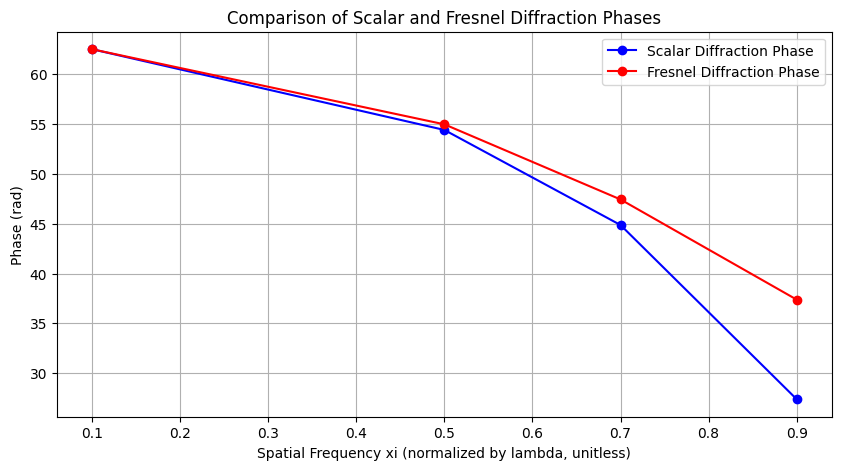

{0.1: -0.0007893498710060953,
 0.5: -0.5638905107948489,
 0.7: -2.567130894710843,
 0.9: -9.99718278018318}

In [5]:
# 1

# Define the given values in meters
lambda_value = 1e-6  # wavelength in meters (1 µm)
z_value = 10e-6  # propagation distance in meters (10 µm)

# Spatial frequencies to evaluate (in m^-1)
xi_values = np.array([0.1, 0.5, 0.7, 0.9]) / lambda_value

# Wave number
k = 2 * np.pi / lambda_value

# Calculate the phase for scalar diffraction transfer function
phi_s_corrected = lambda xi: k * z_value * np.sqrt(1 - lambda_value**2 * xi**2)

# Calculate the phase for Fresnel diffraction transfer function
phi_f_corrected = lambda xi: k * z_value - np.pi * lambda_value * z_value * xi**2

# Compute the phase values for the given spatial frequencies
phi_s_values_corrected = phi_s_corrected(xi_values)
phi_f_values_corrected = phi_f_corrected(xi_values)

# Compute the phase differences
phase_differences_corrected = phi_s_values_corrected - phi_f_values_corrected

# Plotting both phases on the same plot for comparison
plt.figure(figsize=(10, 5))

# Plot for Scalar diffraction
plt.plot(xi_values * lambda_value, phi_s_values_corrected, 'bo-', label='Scalar Diffraction Phase')

# Plot for Fresnel diffraction
plt.plot(xi_values * lambda_value, phi_f_values_corrected, 'ro-', label='Fresnel Diffraction Phase')

plt.title('Comparison of Scalar and Fresnel Diffraction Phases')
plt.xlabel('Spatial Frequency xi (normalized by lambda, unitless)')
plt.ylabel('Phase (rad)')
plt.legend()
plt.grid(True)

plt.show()

# Output the phase differences with proper units and values for lambda and z
phase_differences_corrected_dict = dict(zip(xi_values * lambda_value, phase_differences_corrected))
phase_differences_corrected_dict

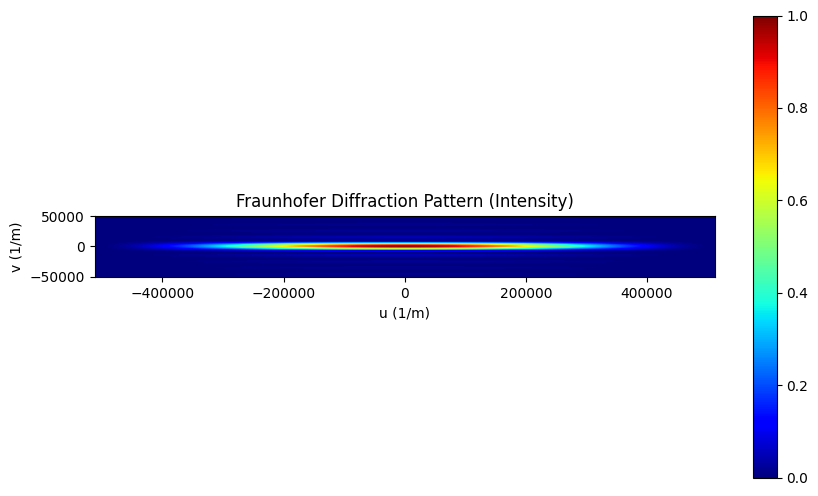

In [10]:
# 2a

# Calculate the pupil function for the three-slit aperture
Lx = 0.1e-2  # 0.1 cm in meters
Ly = 1e-2    # 1 cm in meters
d = 0.5e-2   # 0.5 cm in meters

# Define the spatial domain for computation
x = np.linspace(-2*Lx, 2*Lx, 4096)
y = np.linspace(-Ly/2, Ly/2, 1024)
X, Y = np.meshgrid(x, y)

# Define the pupil function for the three slits
P = rect((X - d) / Lx, Lx) * rect(Y / Ly, Ly) + rect(X / Lx, Lx) * rect(Y / Ly, Ly) + rect((X + d) / Lx, Lx) * rect(Y / Ly, Ly)

# Calculate the Fraunhofer diffraction pattern
U = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(P)))
I = np.abs(U)**2  # This is the intensity calculation

# Normalize and plot the intensity pattern
I_normalized = I / np.max(I)

# Define the observation grid in the spatial frequency domain
u = np.fft.fftshift(np.fft.fftfreq(x.shape[0], x[1] - x[0]))
v = np.fft.fftshift(np.fft.fftfreq(y.shape[0], y[1] - y[0]))

# Plot the Fraunhofer diffraction pattern
plt.figure(figsize=(10, 6))
plt.imshow(I_normalized, cmap='jet', extent=(u.min(), u.max(), v.min(), v.max()))
plt.colorbar()
plt.title('Fraunhofer Diffraction Pattern (Intensity)')
plt.xlabel('u (1/m)')
plt.ylabel('v (1/m)')
plt.show()

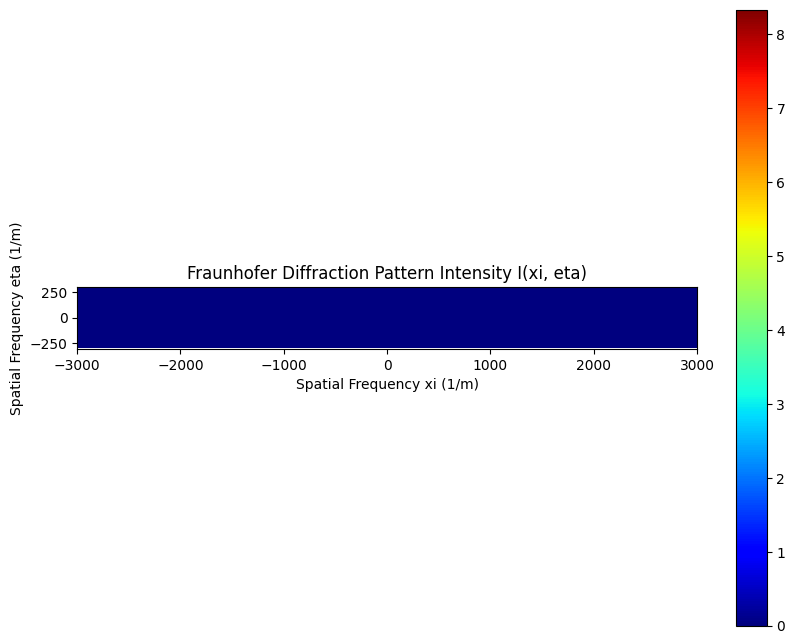

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the problem
Lx = 0.1e-2  # Aperture width in meters (0.1 cm)
Ly = 1e-2    # Aperture height in meters (1 cm)
d = 0.5e-2   # Distance between slits in meters (0.5 cm)
lambda_value = 1e-6  # Wavelength in meters (1 um)
z = 3140     # Observation distance in meters (3140 m)

# Define the sinc function
def sinc(x):
    return np.sinc(x / np.pi)

# Spatial frequency domain for xi and eta
xi = np.linspace(-3 / Lx, 3 / Lx, 5000)  # Spatial frequency domain for xi
eta = np.linspace(-3 / Ly, 3 / Ly, 5000)  # Spatial frequency domain for eta
XI, ETA = np.meshgrid(xi, eta)

# Compute the Fraunhofer diffraction pattern intensity
I = (np.abs(sinc(Lx * XI / (lambda_value * z)) * sinc(Ly * ETA / (lambda_value * z)) *
    (1 + 2 * np.cos(2 * np.pi * d * XI / (lambda_value * z))))**2)

# Plot the intensity pattern for xi and eta
plt.figure(figsize=(10, 8))
plt.imshow(I, cmap='jet', extent=(xi.min(), xi.max(), eta.min(), eta.max()))
plt.colorbar()
plt.title('Fraunhofer Diffraction Pattern Intensity I(xi, eta)')
plt.xlabel('Spatial Frequency xi (1/m)')
plt.ylabel('Spatial Frequency eta (1/m)')
plt.show()


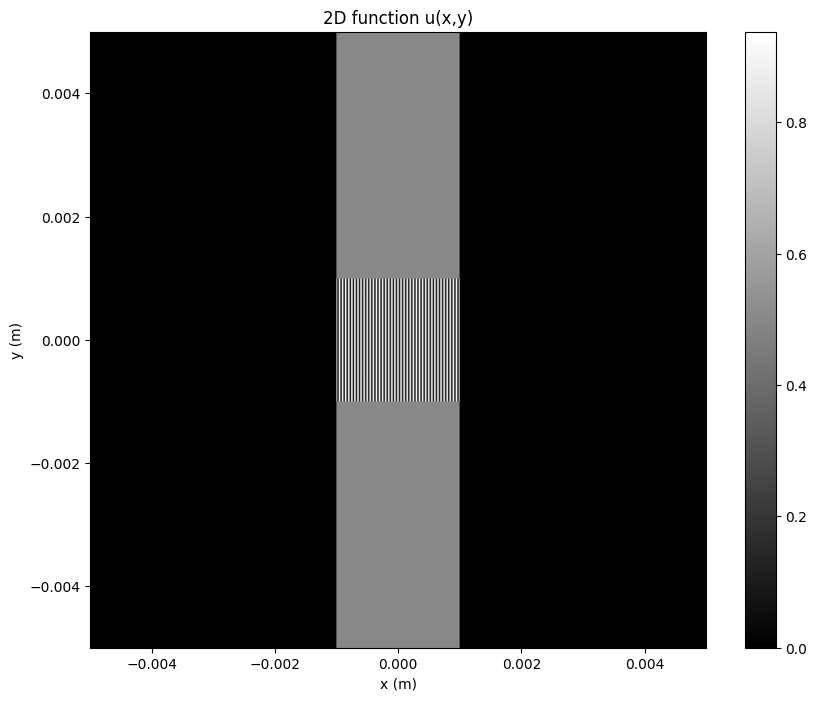

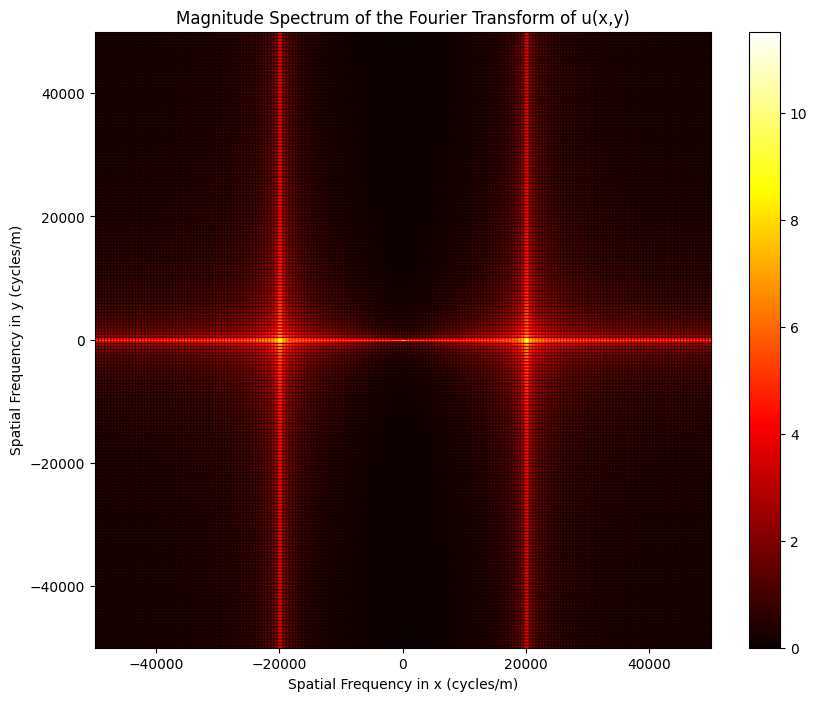

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 3

# Define the rect function as described
def rect(x, L):
    return np.where(np.abs(x) <= L/2, 1, 0)

# Define the sinc function (normalized sinc function here)
def sinc(x):
    return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))

# Parameters (assuming some values for L, lambda, and f)
L = 2e-3  # L parameter in meters
lambda_ = 1e-6  # Wavelength of light in meters
f = 0.1  # Focal length in meters
f0 = 20  # Spatial frequency in cycles/mm, converted to cycles/m

# Spatial coordinates
x = np.linspace(-5e-3, 5e-3, 1000)  # 10 mm range
y = np.linspace(-5e-3, 5e-3, 1000)  # 10 mm range
X, Y = np.meshgrid(x, y)

# Compute u(x,y)
u_xy = 0.5 * rect(X, L) + 0.5 * np.cos(2 * np.pi * f0 * 1e3 * X) * rect(X, L) * rect(Y, L)

# Plotting u(x,y)
plt.figure(figsize=(10, 8))
plt.imshow(u_xy, extent=(x.min(), x.max(), y.min(), y.max()), cmap='gray')
plt.colorbar()
plt.title('2D function u(x,y)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

from scipy.fft import fft2, fftshift

# Perform the 2D Fourier Transform on the u(x,y) function
U_fxy = fft2(u_xy)
U_fxy_shifted = fftshift(U_fxy)  # Shift the zero frequency component to the center of the spectrum

# Frequency coordinates
fx = np.linspace(-0.5/(x[1]-x[0]), 0.5/(x[1]-x[0]), len(x))
fy = np.linspace(-0.5/(y[1]-y[0]), 0.5/(y[1]-y[0]), len(y))
Fx, Fy = np.meshgrid(fx, fy)

# Since we cannot plot delta functions, we will plot the magnitude spectrum
magnitude_spectrum = np.abs(U_fxy_shifted)

# Plotting the magnitude of the Fourier Transform
plt.figure(figsize=(10, 8))
plt.imshow(np.log(magnitude_spectrum + 1), extent=(fx.min(), fx.max(), fy.min(), fy.max()), cmap='hot')
plt.colorbar()
plt.title('Magnitude Spectrum of the Fourier Transform of u(x,y)')
plt.xlabel('Spatial Frequency in x (cycles/m)')
plt.ylabel('Spatial Frequency in y (cycles/m)')
plt.show()


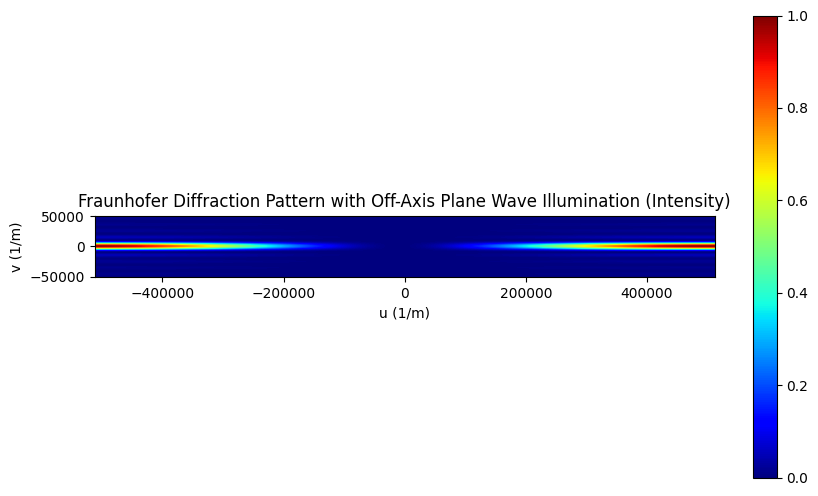

In [10]:
# Parameters for the slit aperture
Lx = 0.1e-2  # 0.1 cm in meters
Ly = 1e-2    # 1 cm in meters
d = 0.5e-2   # 0.5 cm in meters

# Wavelength of light
lambda_ = 1e-6  # Wavelength in meters
k = 2 * np.pi / lambda_  # Wave number

# Define the spatial domain for computation
x = np.linspace(-2*Lx, 2*Lx, 4096)
y = np.linspace(-Ly/2, Ly/2, 1024)
X, Y = np.meshgrid(x, y)

# Define the pupil function for the three slits
P = rect((X - d) / Lx, Lx) * rect(Y / Ly, Ly) + \
    rect(X / Lx, Lx) * rect(Y / Ly, Ly) + \
    rect((X + d) / Lx, Lx) * rect(Y / Ly, Ly)

# Define the incoming wavefront u_in(x, y) for an off-axis plane wave
u_in = np.exp(1j * k * 0.5 * X)

# Multiply the pupil function P by the incoming wavefront to get the total field at the aperture
total_field = P * u_in

# Calculate the Fraunhofer diffraction pattern (Fourier Transform of the total field)
U_b = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(total_field)))
I_b = np.abs(U_b)**2  # Intensity pattern

# Normalize the intensity pattern
I_normalized_b = I_b / np.max(I_b)

# Define the observation grid in the spatial frequency domain
u = np.fft.fftshift(np.fft.fftfreq(x.shape[0], x[1] - x[0]))
v = np.fft.fftshift(np.fft.fftfreq(y.shape[0], y[1] - y[0]))

# Plot the Fraunhofer diffraction pattern for the off-axis plane wave illumination
plt.figure(figsize=(10, 6))
plt.imshow(I_normalized_b, cmap='jet', extent=(u.min(), u.max(), v.min(), v.max()))
plt.colorbar()
plt.title('Fraunhofer Diffraction Pattern with Off-Axis Plane Wave Illumination (Intensity)')
plt.xlabel('u (1/m)')
plt.ylabel('v (1/m)')
plt.show()